https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from random import randint
import matplotlib.pyplot as plt
from numpy import array
import numpy as np

List audio files. May not be needed.

In [3]:
import os
file_list = os.listdir('/content/gdrive/My Drive/encoder_decoder/Audio')

lst = []

for file1 in file_list:
  #print('title: %s, id: %s' % (file1['title'], file1['id']))
  #lst.append([file1['title'], file1['id']])
  lst.append(file1)

lst.sort()
lst

['background_only_00.wav',
 'background_only_01.wav',
 'background_test_00.wav',
 'background_train_00.wav',
 'background_train_01.wav',
 'background_train_full.wav',
 'drum_only_00.wav',
 'drum_sample-01.wav',
 'drum_sample-02.wav',
 'drum_sample-03.wav',
 'drum_sample-04.wav',
 'drum_sample-05.wav',
 'drum_sample-06.wav',
 'drum_sample-07.wav',
 'drum_sample-08.wav',
 'drum_sample-09.wav',
 'drum_sample-10.wav',
 'drum_sample-11.wav',
 'drum_sample-12.wav',
 'drum_sample-13.wav',
 'drum_sample-14.wav',
 'drum_sample-15.wav',
 'drum_sample-16.wav',
 'drum_sample-17.wav',
 'drum_sample-18.wav',
 'drum_sample-19.wav',
 'drum_sample-20.wav',
 'drum_sample-21.wav',
 'drum_sample-22.wav',
 'drum_sample-23.wav',
 'drum_sample-24.wav',
 'drum_sample-25.wav',
 'drum_sample-26.wav',
 'drum_sample-27.wav',
 'drum_sample-28.wav',
 'drum_sample-29.wav',
 'drum_sample-30.wav',
 'drum_sample-31.wav',
 'drum_sample-32.wav',
 'drum_test-01.wav',
 'drum_test-02.wav',
 'drum_test-03.wav',
 'drum_test-0

##Import Functions
This section creates functions to import wave files from the list.

In [0]:
import wave
import struct
import matplotlib.pyplot as plt

#x = wave.open('/content/gdrive/My Drive/encoder_decoder/Audio/drum_train-07.wav', 'r')



def read_whole(filename):
    wav_r = wave.open(filename, 'r')
    ret = []
    while wav_r.tell() < wav_r.getnframes():
        decoded = struct.unpack("<h", wav_r.readframes(1))
        ret.append(decoded)
    return ret

def import_audio_from_drive(audiofilename, location):
  # audio_import_content = drive.CreateFile({'id': driveid})
  # audio_import_content.GetContentFile(audiofilename)
  audiolink = str(location + audiofilename)
  audio_import = read_whole(audiolink)
  return audio_import

# Examples:
#drum_train_07b = import_audio_from_drive('drum_sample-07.wav', '16_q91ouccEkyv-uRH3WAEbAb_rgDlLSW')

## Import Audio

In [0]:
audio_folder = '/content/gdrive/My Drive/encoder_decoder/Audio/'

# background noise
background_train_full = import_audio_from_drive('background_train_full.wav', audio_folder)

# train samples
drum_train_01 = import_audio_from_drive('drum_sample-01.wav', audio_folder)
drum_train_02 = import_audio_from_drive('drum_sample-02.wav', audio_folder)
drum_train_03 = import_audio_from_drive('drum_sample-03.wav', audio_folder)
 
drum_train_04 = import_audio_from_drive('drum_sample-04.wav', audio_folder)
drum_train_05 = import_audio_from_drive('drum_sample-05.wav', audio_folder)
drum_train_06 = import_audio_from_drive('drum_sample-06.wav', audio_folder)
drum_train_07 = import_audio_from_drive('drum_sample-07.wav', audio_folder)
drum_train_08 = import_audio_from_drive('drum_sample-08.wav', audio_folder)
drum_train_09 = import_audio_from_drive('drum_sample-09.wav', audio_folder)
drum_train_10 = import_audio_from_drive('drum_sample-10.wav', audio_folder)
drum_train_11 = import_audio_from_drive('drum_sample-11.wav', audio_folder)
drum_train_12 = import_audio_from_drive('drum_sample-12.wav', audio_folder)
drum_train_13 = import_audio_from_drive('drum_sample-13.wav', audio_folder)
drum_train_14 = import_audio_from_drive('drum_sample-14.wav', audio_folder)

# test samples
drum_test_15 = import_audio_from_drive('drum_sample-15.wav', audio_folder)
drum_test_16 = import_audio_from_drive('drum_sample-16.wav', audio_folder)
drum_test_17 = import_audio_from_drive('drum_sample-17.wav', audio_folder)
drum_test_18 = import_audio_from_drive('drum_sample-18.wav', audio_folder)
drum_test_19 = import_audio_from_drive('drum_sample-19.wav', audio_folder)
drum_test_20 = import_audio_from_drive('drum_sample-20.wav', audio_folder)
drum_test_21 = import_audio_from_drive('drum_sample-21.wav', audio_folder)
drum_test_22 = import_audio_from_drive('drum_sample-22.wav', audio_folder)
drum_test_23 = import_audio_from_drive('drum_sample-23.wav', audio_folder)
drum_test_24 = import_audio_from_drive('drum_sample-24.wav', audio_folder)
drum_test_25 = import_audio_from_drive('drum_sample-25.wav', audio_folder)
drum_test_26 = import_audio_from_drive('drum_sample-26.wav', audio_folder)
drum_test_27 = import_audio_from_drive('drum_sample-27.wav', audio_folder)

In [0]:
# Dont run this yet. get_variance() function to pull change in x values START HERE: SOMETHING SEEMS WRONG LIKE IT IS NOT WORKING WITH THE LATER PIECES
def get_variance(input_array):
    slide_array = np.append(0, input_array[0:-1])
    output_array = input_array - slide_array
    return output_array

## Assemble Waves and more functions
Put wave files together. Create additional functions to generate final samples.

In [0]:
#### NOT SURE IF NEEDED ctrl + /
# import numpy as np
# 
# import struct
# import wave

# #import os

# #import keras
# from keras.models import Model, Sequential
# from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape
# from keras import regularizers

# 



In [0]:
# Need to improve speed of import.  See http://www.cameronmacleod.com/blog/reading-wave-python

sample_length = 9984#10000
total_rows = 1000 #5000
train_rows = 700 #4000
#n_features = highest_number + 1 # NOTE: no number can be larger than 60.  So for kick it would be ~27k??
n_steps_in =  sample_length #15  #6
n_steps_out = sample_length #15 #3

percussion_list = [drum_train_01,
                   drum_train_02,
                   drum_train_03,
                   drum_train_04,
                   drum_train_05,
                   drum_train_06,
                   drum_train_07,
                   drum_train_08,
                   drum_train_09,
                   drum_train_10,
                   drum_train_11,
                   drum_train_12,
                   drum_train_13,
                   drum_train_14]

percussion_list_test = [drum_test_15,
                   drum_test_16,
                   drum_test_17,
                   drum_test_18,
                   drum_test_19,
                   drum_test_20,
                   drum_test_21,
                   drum_test_22,
                   drum_test_23,
                   drum_test_24,
                   drum_test_25,
                   drum_test_26,
                   drum_test_27]

# Function to create background noise files from sample file
def generate_background(n_samples, background_music):
    background_train_full_length = len(background_train_full)
    background_start = randint(0, background_train_full_length - sample_length)
    background = background_train_full[background_start:(background_start + 9984)]
    background = [background[j][0] for j in range (len(background))]
    return background

background_test = generate_background(1, background_train_full)

# Function to pick a random percussion noise
def generate_percussion(sound_list):
    percussion = percussion_list[randint(0,(len(percussion_list) - 1))]
    percussion = [percussion[j][0] for j in range (len(percussion))]
    percussion += [0] * int(sample_length - len(percussion))
    #percussion = np.asarray(percussion)
    return percussion
                
percussion_test = generate_percussion(percussion_list)

def get_dataset(n_in, n_out, sound_list_name, background_train_list, n_samples):
        X1, y = list(), list()
#        X1, y = array(), array()
        for _ in range(n_samples):
                # generate source sequence
                background_generated = generate_background(1, background_train_list)
                percussion_generated = generate_percussion(sound_list_name)
                # define padded target sequence
                source = [background_generated[i]+percussion_generated[i] for i in range(len(background_generated))]
                #note: can add noise to target below, see old file
                target = percussion_generated
                target = target[:n_out] #just in case i decide to change lengths later
                
                #new added 4/19/2019 to calculate variance
                #source = get_variance(source)
                #target = get_variance(target)
                #new above added 4/19/2019
                
                # create padded input target sequence
#                target_in = [0] + target[:-1]
                # encode
#                src_encoded = to_categorical([source], num_classes=cardinality)
#                tar_encoded = to_categorical([target], num_classes=cardinality)
#                tar2_encoded = to_categorical([target_in], num_classes=cardinality)
#                # store


                X1.append(source)
#                X2.append(tar2_encoded)
                y.append(target)
#        X1 = np.squeeze(array(X1), axis=1) 
#        X2 = np.squeeze(array(X2), axis=1) 
#        y = np.squeeze(array(y), axis=1)
        X1 = array(X1)
        y = array(y)         
        return X1, y


## Create data sets
X1_real_test, y_real_test <- these are based on percussion_list_test, which the model hasn't seen before. So these should be more challenging to duplicate.

In [7]:
X1, y = get_dataset(n_steps_in, n_steps_out, percussion_list, background_train_full, total_rows )
print(X1.shape, y.shape)

total_rows_real_test = 10 # Number of rows for samples model hasn't seen yet
X1_real_test, y_real_test = get_dataset(n_steps_in, n_steps_out, percussion_list, background_train_full, total_rows_real_test )

(1000, 9984) (1000, 9984)


## Split and normalize train and test data

(700, 9984) (300, 9984) (700, 9984) (300, 9984)


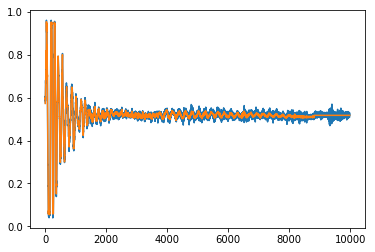

In [8]:
# from conv_decoder.py

x_train = X1[0:train_rows,]
y_train = y[0:train_rows,]
x_test = X1[train_rows:,]
y_test = y[train_rows:,]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Get min value and increase all data by that amount
min_value = float(min(x_train.min(), y_train.min(), x_test.min(), y_test.min()))

x_train = x_train + - min_value
y_train = y_train + - min_value
x_test = x_test + - min_value
y_test = y_test + - min_value

# Repeat for samples model has not yet seen
X1_real_test = X1_real_test + - min_value
y_real_test = y_real_test + - min_value


# Scales the training and test data to range between 0 and 1.
max_value = float(max(x_train.max(), y_train.max(), x_test.max(), y_test.max()))
x_train = x_train.astype('float32') / max_value
y_train = y_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value
y_test = y_test.astype('float32') / max_value

X1_real_test = X1_real_test.astype('float32') / max_value
y_real_test = y_real_test.astype('float32') / max_value


x_train.shape, x_test.shape, y_train.shape, y_test.shape
# ((60000, 28, 28), (10000, 28, 28))

x_train = x_train.reshape((len(x_train), sample_length, 1))
y_train = y_train.reshape((len(y_train), sample_length, 1))
x_test = x_test.reshape((len(x_test), sample_length, 1))
y_test = y_test.reshape((len(y_test), sample_length, 1))

X1_real_test = X1_real_test.reshape((len(X1_real_test), sample_length, 1))
y_real_test = y_real_test.reshape((len(y_real_test), sample_length, 1))


x_train.shape, x_test.shape, y_train.shape, y_test.shape

# New, check...no need for noise
x_train_noisy = x_train 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

X1_real_test_noisy = X1_real_test
X1_real_test_noisy = np.clip(X1_real_test_noisy, 0., 1.)



row_num = 1
plt.plot(x_train_noisy[row_num])
plt.plot(y_train[row_num])


# plt.plot(x_test_noisy[row_num])
# plt.plot(y_test[row_num])

Set up environment

Create images folder
Install scipy for use with <code>scipy.misc.imsave()</code> piece.

In [0]:
# import os
# os.mkdir("images")

# !pip install Pillow==5.0.0
# !pip install scipy==1.0.1

Import images and save to array

In [9]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, ZeroPadding1D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, UpSampling1D, Conv1D 
from keras.models import Sequential, Model
from keras.optimizers import Adam
import scipy.misc
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

Using TensorFlow backend.


Move images to pandas

In [0]:
# df = pd.read_csv("sample_data/mnist_test.csv")
# images = df.iloc[:,1:].to_numpy()
# labels = df.iloc[:,0].values.tolist()
# print(images.shape)
# #images.head(2)
# images[1,1:100]

Create images and place into images folder

In [0]:
# for i in range(len(images)):
#   out = str("images/mnist_" + str(i) + ".png")
#   scipy.misc.imsave(out, np.array(images[i]).reshape(28,28))        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


Functions to create:

*   the discriminator - <code>build_discriminator</code> 
*   the generator - <code>build_generator</code>
*   an image creator/saver - <code>save_imgs</code>


 

In [0]:
#### NOTE: REPLACED img WITH audio
# Discriminator
def build_discriminator():

    model = Sequential()

#    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
    model.add(Conv1D(32, kernel_size=3, strides=2, input_shape=audio_shape, padding="same", name='Discr_Conv1D_1'))
    model.add(LeakyReLU(alpha=0.2, name='Discr_LeakyReLU_1'))
    model.add(Dropout(0.25, name='Discr_Dropout_1'))

#    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(Conv1D(64, kernel_size=3, strides=2, padding="same", name='Discr_Conv1D_2'))

#    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(ZeroPadding1D(padding=((0),(0)), name='Discr_ZeroPadding1D_1'))

    model.add(BatchNormalization(momentum=0.8, name='Discr_BatchNormalization_1'))
    model.add(LeakyReLU(alpha=0.2, name='Discr_LeakyReLU_2'))
    model.add(Dropout(0.25, name='Discr_Dropout_2'))

#    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(Conv1D(128, kernel_size=3, strides=2, padding="same", name='Discr_Conv1D_3'))

    model.add(BatchNormalization(momentum=0.8, name='Discr_BatchNormalization_2'))
    model.add(LeakyReLU(alpha=0.2, name='Discr_LeakyReLU_3'))
    model.add(Dropout(0.25, name='Discr_Dropout_3'))

#    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(Conv1D(256, kernel_size=3, strides=1, padding="same", name='Discr_Conv1D_4'))

    model.add(BatchNormalization(momentum=0.8, name='Discr_BatchNormalization_3'))
    model.add(LeakyReLU(alpha=0.2, name='Discr_LeakyReLU_4'))
    model.add(Dropout(0.25, name='Discr_Dropout_4'))
    model.add(Flatten(name='Discr_Flatten_1'))
    model.add(Dense(1, activation='sigmoid', name='Discr_Dense_1'))

    model.summary()

    audio = Input(shape=audio_shape)
    validity = model(audio)

    return Model(audio, validity)

# Generator
def build_generator():

    model = Sequential()

    # model.add(Dense(128 * 7 * 7, activation="relu", input_dim=latent_dim))
    model.add(Dense(sample_length, activation="relu", input_dim=sample_length, name='Gen_Dense_1')) ## TWO CHANGES HERE
 
    # model.add(Reshape((7, 7, 128)))
   # model.add(Reshape((1, sample_length), name='Gen_Reshape_1'))
    model.add(Reshape((int(sample_length/128), 128), name='Gen_Reshape_1'))
    
    #model.add(UpSampling2D())
    model.add(UpSampling1D(name='Gen_UpSampling1D_1'))
    
#    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(Conv1D(128, kernel_size=3, padding="same", name='Gen_Conv1D_1'))

    model.add(BatchNormalization(momentum=0.8, name='Gen_BatchNormalization_1'))
    model.add(Activation("relu", name='Gen_Activation_1'))

#    model.add(UpSampling2D())
    model.add(UpSampling1D(64, name='Gen_UpSampling1D_2'))

#    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(Conv1D(64, kernel_size=3, padding="same", name='Gen_Conv1D_2'))

    model.add(BatchNormalization(momentum=0.8, name='Gen_BatchNormalization_2'))
    model.add(Activation("relu", name='Gen_Activation_2'))

#    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    model.add(Conv1D(channels, kernel_size=3, padding="same", name='Gen_Conv1D_3'))

    model.add(Activation("tanh", name='Gen_Activation_3'))

    model.summary()

    noise = Input(shape=(sample_length,)) # REMOVED latent_dim
    audio = model(noise)

    return Model(noise, audio)

# Image creator/saver
def save_audios(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, sample_length)) # REMOVED latent_dim
    gen_audios = generator.predict(noise)

    # Rescale images 0 - 1
    gen_audios = 0.5 * gen_audios + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_audios[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/mnist_%d.png" % epoch)
    plt.close()

In [11]:
# Input shape
img_rows = 28
img_cols = 28


channels = 1

#img_shape = (img_rows, img_cols, channels)
#### NOTE THE SWITCH HERE, ADDING 1
audio_shape = (sample_length, channels)

#DELETED
#latent_dim = 100

optimizer = Adam(0.00005, 0.75)


# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
# z = Input(shape=(latent_dim,))  #MAJOR CHANGE@@###############################
z = Input(shape=(sample_length,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Discr_Conv1D_1 (Conv1D)      (None, 4992, 32)          128       
_________________________________________________________________
Discr_LeakyReLU_1 (LeakyReLU (None, 4992, 32)          0         
_________________________________________________________________
Discr_Dropout_1 (Dropout)    (None, 4992, 32)          0         
_________________________________________________________________
Discr_Conv1D_2 (Conv1D)      (None, 2496, 64)          6208      
_________________________________________________________________
Discr_ZeroPadding1D_1 (ZeroP (None, 2496, 64)          0         
_________________________________________________________________
Discr_BatchNormalization_1 ( (None, 2496, 64)          256       
_

In [12]:
# Variables
epochs=4 #4000
batch_size=256
save_interval=50

# Load the dataset
(X_train, _), (_, _) = mnist.load_data()

# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))


11493376/11490434 [==============================] - 0s 0us/step


Shape check

In [13]:
print("X_train.shape (mnist):", X_train.shape, "\nX1.shape:", X1.shape, "\ny.shape:", y.shape, "\nx_train_noisy.shape:", x_train_noisy.shape,
"\ny_train.shape:", y_train.shape)

X_train.shape (mnist): (60000, 28, 28, 1) 
X1.shape: (1000, 9984) 
y.shape: (1000, 9984) 
x_train_noisy.shape: (700, 9984, 1) 
y_train.shape: (700, 9984, 1)


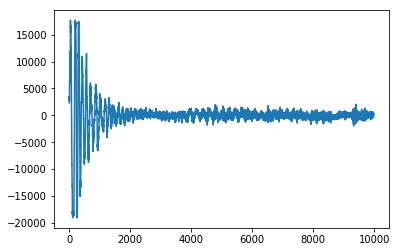

In [14]:
plt.plot(X1[1])

Train to generator object

In [0]:
# REPLACED X_train with y_train AND imgs WITH audio

for epoch in range(epochs):
  print(epoch)
  # ---------------------
  #  Train Discriminator
  # ---------------------

  # Select a random half of images
  idx = np.random.randint(0, y_train.shape[0], batch_size)
  audio = y_train[idx]

  # Sample noise and generate a batch of new images
  # noise = np.random.normal(0, 1, (batch_size, latent_dim))
  noise = x_train_noisy[idx].reshape(batch_size,sample_length)
  gen_audio = generator.predict(noise)

  # Train the discriminator (real classified as ones and generated as zeros)
  d_loss_real = discriminator.train_on_batch(audio, valid)
  d_loss_fake = discriminator.train_on_batch(gen_audio, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  # ---------------------
  #  Train Generator
  # ---------------------

  # Train the generator (wants discriminator to mistake images as real)
  g_loss = combined.train_on_batch(noise, valid)

  # Plot the progress
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  # If at save interval => save generated image samples
  # if epoch % save_interval == 0:
  #     save_audios(epoch)

0


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


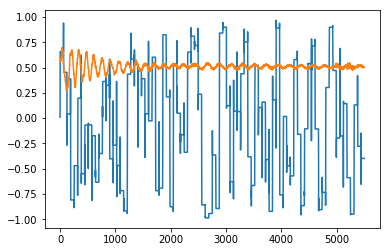

In [91]:
#generator.predict(x_train_noisy[0])

#plt.plot(x_train_noisy[0].reshape(1,sample_length))

#xxx = generator.predict(x_train_noisy[0].reshape(sample_length,1))
xxx = generator.predict(x_train_noisy[0].reshape(1,sample_length))
plt.plot(xxx.reshape(sample_length)[1:5500])
plt.plot(x_train_noisy[0][1:5500])

View images from first 100 epochs

In [0]:
from IPython.display import Image
Image('images/mnist_100.png')


View images from last epoch

In [0]:
Image('images/mnist_3900.png')